<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/Gradua%C3%A7%C3%A3o/2024/20241015_Overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulação de Overfit (sobre ajuste) de modelos de machine learning

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as skpp

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/mtcars.csv')

In [86]:
# Hipótese: conseguimos prever MPG (y) a partir da variável wt (x)?

# Vamos analisar a correção entre as variáveis
# Matriz de correlação das variáveis numéricas
dfn = df.select_dtypes(include=['number'])
corr = dfn.corr()
corr.style.background_gradient(cmap='coolwarm')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<Axes: xlabel='wt', ylabel='mpg'>

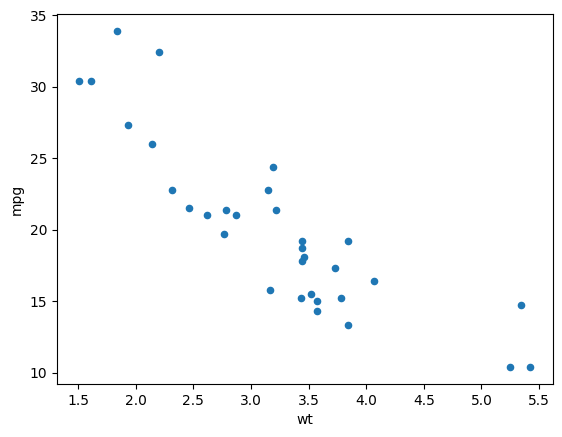

In [87]:
# Gráfico de dispersão entre MPG e WT
df.plot.scatter(x='wt', y='mpg')

In [88]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['wt']], df['mpg'], test_size=0.25, random_state=1)

In [89]:
poly = skpp.PolynomialFeatures(degree=14)
x_treino = poly.fit_transform(x_treino)
x_teste = poly.transform(x_teste)

mod = LinearRegression()
mod.fit(x_treino, y_treino)

LinearRegression()

In [90]:
mod.coef_

array([ 0.00000000e+00,  2.00368912e+04,  7.52550960e+03, -1.48664505e+04,
       -1.11634440e+04,  1.50275291e+04,  8.86895290e+03, -2.25815187e+04,
        1.69820323e+04, -7.21270725e+03,  1.94467212e+03, -3.40823100e+02,
        3.77774233e+01, -2.41229535e+00,  6.77353487e-02])

In [91]:
mod.intercept_

-14579.797719130913

In [92]:
# R2
print(mod.score(x_treino, y_treino))

0.9756984839903652


In [93]:
y_prev = mod.predict(x_teste)
print(mean_squared_error(y_teste, y_prev))

615.2115938033679
